<a href="https://colab.research.google.com/github/AldiPrasetyoHari/Tugas1FGABDPython/blob/main/Projek_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Source : https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset <br>
Reference Bloop Pressure Category : https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings <br><br>

Dataset Columns:<br>
Person ID: An identifier for each individual.<br>
Gender: The gender of the person (Male/Female).<br>
Age: The age of the person in years.<br>
Occupation: The occupation or profession of the person.<br>
Sleep Duration (hours): The number of hours the person sleeps per day.<br>
Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.<br>
Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.<br>
Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.<br>
BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).<br>
Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.<br>
Heart Rate (bpm): The resting heart rate of the person in beats per minute.<br>
Daily Steps: The number of steps the person takes per day.<br>
Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).<br>

Details about Sleep Disorder Column:

None: The individual does not exhibit any specific sleep disorder.<br>
Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.<br>
Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.<br>

<br><br>
Blood pressure category didefinisikan ulang dalam nilai numerik yakni :<br> 1->Normal<br> 2->Elevated<br> 3->Hypertensive Stage 1<br> 4->Hypertensive Stage 2<br> 5->Hypertensive Critis.

In [ ]:
# import modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# import file with data
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/Sleep Revise_A24.xlsx")

#Tampilkan header dan 5 data di baris awal
df.head(5)


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Systolic,Diastolic,Blood Pressure Category,Blood Pressure Category Number,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126,83,Hypertension Stage 1,3,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125,80,Hypertension Stage 1,3,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125,80,Hypertension Stage 1,3,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,Hypertension Stage 1,3,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140,90,Hypertension Stage 1,3,85,3000,Sleep Apnea


<ipython-input-31-695fe7ab8778>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)


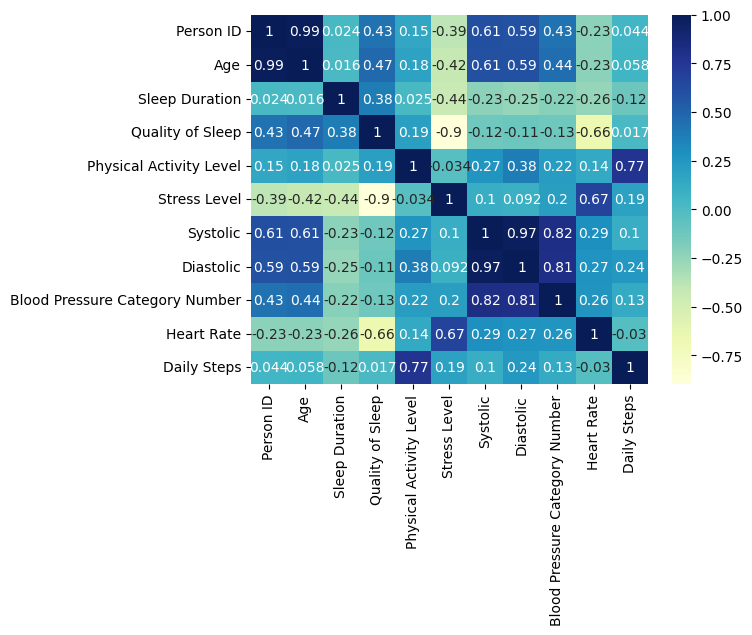

In [ ]:
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(), cmap="YlGnBu", annot=True)

Berdasarkan grafik Heatmap yang dibuat, kita dapat melihat korelasi dari berbagai parameter satu sama lain, dimana semakin besar nilai yang ditunjukan di heatmap tersebut di tiap-tiap parameternya maka menunjukkan keterkaitan antara parameter tersebut. Namun jika nilai korelasi nya mendekati 0 maka dapat diketahui korelasi antar parameter tersebut lemah atau kurang relevan satu sama lain. Sebagai contoh dapat kita lihat korelasi positif dan kuat yakni antara parameter Stress level dengan Heart rate dengan nilai korelasi sebesar 0.67 dimana menunjukkan semakin tinggi level stress maka heart rate akan semakin tinggi. Adapun contoh lainnya yakni korelasi negatif dan kuat yakni antara parameter Heart rate dan quality of sleeps dimana semakin tinggi heart rate yang dialami maka akan semakin berkurang quality of sleeps yang dialami oleh sesorang, inilah yang disebut sebagai korelasi negatif oleh karena itu ia memiliki nilai -0.66

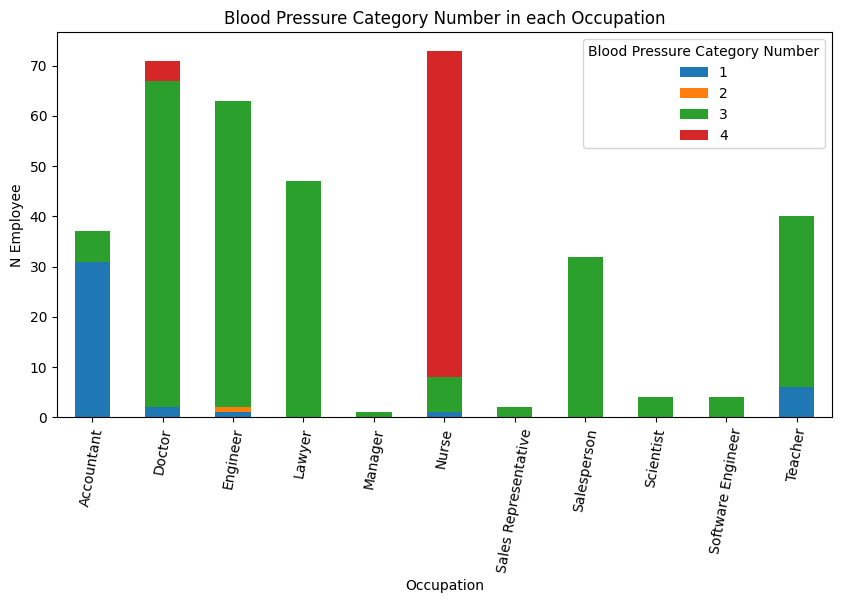

In [ ]:
occupation_stress = pd.crosstab(df['Occupation'], df['Blood Pressure Category Number'])
occupation_stress.plot(kind='bar', stacked=True,figsize=(10,5))

plt.xlabel('Occupation')
plt.ylabel('N Employee')
plt.title('Blood Pressure Category Number in each Occupation')

plt.xticks(rotation=80)
plt.show()

Berdasarkan grafik tersebut dapat diketahui, Ternyata banyak orang yang pekerjaannya sebagai Nurse yang memiliki Blood pressure category 4 yakni mengalami Hypertensive Stage 2 kemudian disusul dengan orang yang memiliki pekerjaan sebagai Doctor.<br><br>
Lalu apakah usia mempengaruhi?? Mari kita lihat rata-rata usia dari setiap pekerjaan yang ada.

Text(0.5, 1.0, 'Average Age VS Occupation')

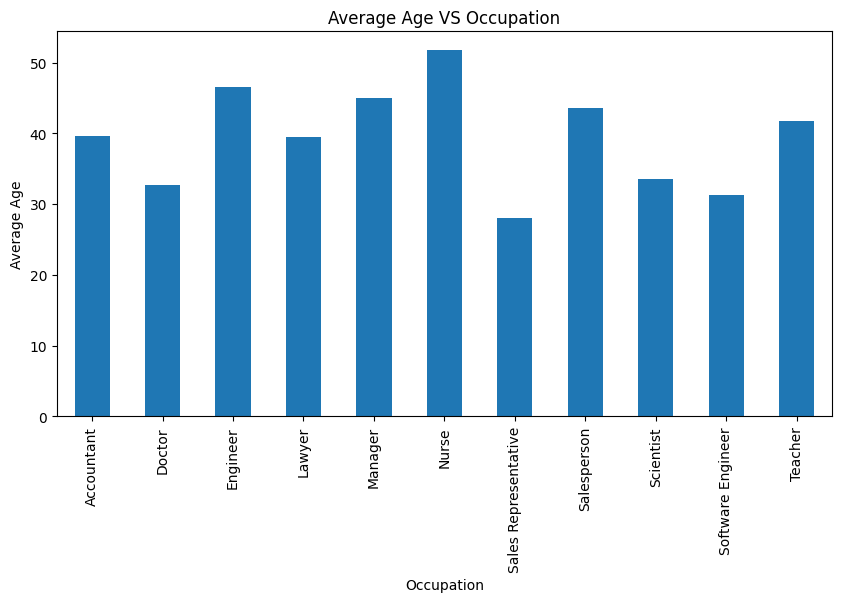

In [ ]:
rerata_umur=df.groupby('Occupation')['Age'].mean().plot(kind="bar",figsize=(10,5))
rerata_umur
plt.xlabel('Occupation')
plt.ylabel('Average Age')
plt.title('Average Age VS Occupation')


Berdasarkan grafik tersebut dapat diketahui usia rata-rata pekerja dari setiap profesi yang ada dimana untuk profesi Nurse memiliki usia rata-rata tertinggi atau dapat dikatakan mayoritas orang yang bekerja sebagai Nurse sudah memasuki usia 50 Tahun dimana ini berkorelasi dengan mayoritas Nurse memiliki angka Blood Pressure Category Number sebesar 4 atau bisa dikatakan mayoritas Nurse menderita Hypertensive Stage 2.

Text(0.5, 1.0, 'Blood Pressure Category Number VS Age')

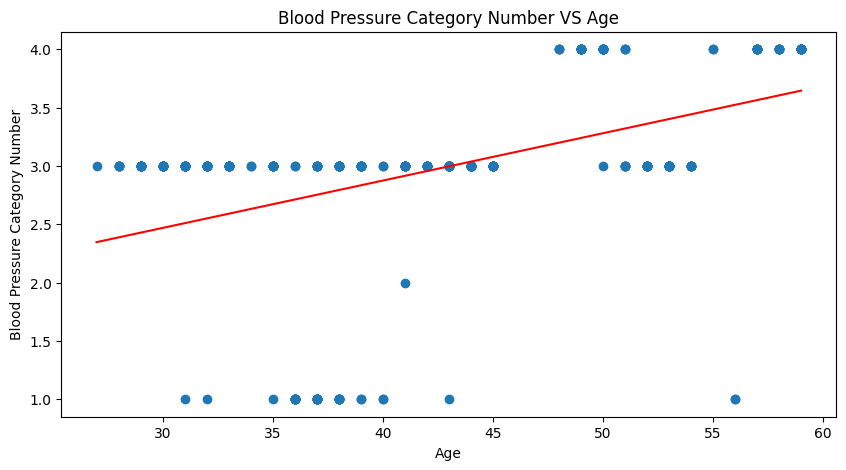

In [ ]:
# Membuat grafik regresi linier
coefficients = np.polyfit(df['Age'], df['Blood Pressure Category Number'], 1)
slope = coefficients[0]
intercept = coefficients[1]
regression_line = np.polyval(coefficients, df['Age'])

# Plotting data
plt.figure(figsize=(10,5))
plt.scatter(df['Age'], df['Blood Pressure Category Number'])

# Menambahkan garis egresi linier
plt.plot(df['Age'], regression_line, color='red')

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Blood Pressure Category Number')
plt.title('Blood Pressure Category Number VS Age')


Gambar scatter plot ini memperkuat argumen dimana semakin tinggi usia maka akan berpeluang menderita Blood pressure category yang semakin tinggi juga. Oleh karena itu scatter plot menunjukkan korelasi positif dan dapat dilihat melalui heat map juga ia memiliki nilai korelasi sebesar 0.44 .<br><br>

Apakah hanya usia yang menjadi faktor pada Nurse yang mengakibatkan dominannya penderita Hypertensive stage 2 pada profesi tersebut??

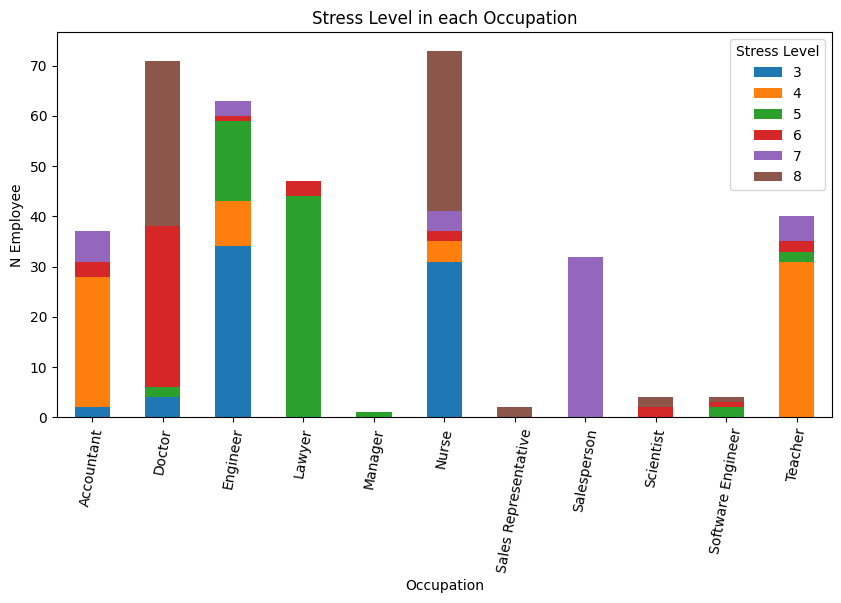

In [ ]:
stress = pd.crosstab(df['Occupation'], df['Stress Level'])
stress.plot(kind='bar', stacked=True,figsize=(10,5))

plt.xlabel('Occupation')
plt.ylabel('N Employee')
plt.title('Stress Level in each Occupation')

plt.xticks(rotation=80)
plt.show()

Berdasarkan grafik dapat diketahui juga ternyata banyak orang yang berprofesi sebagai Nurse menyatakan mengalami stress level yang tinggi yakni di angka 8. Hal ini juga lah yang menyebabkan mayoritas dari orang yang berprofesi sebagai Nurse menderita Hypertensive stage 2.

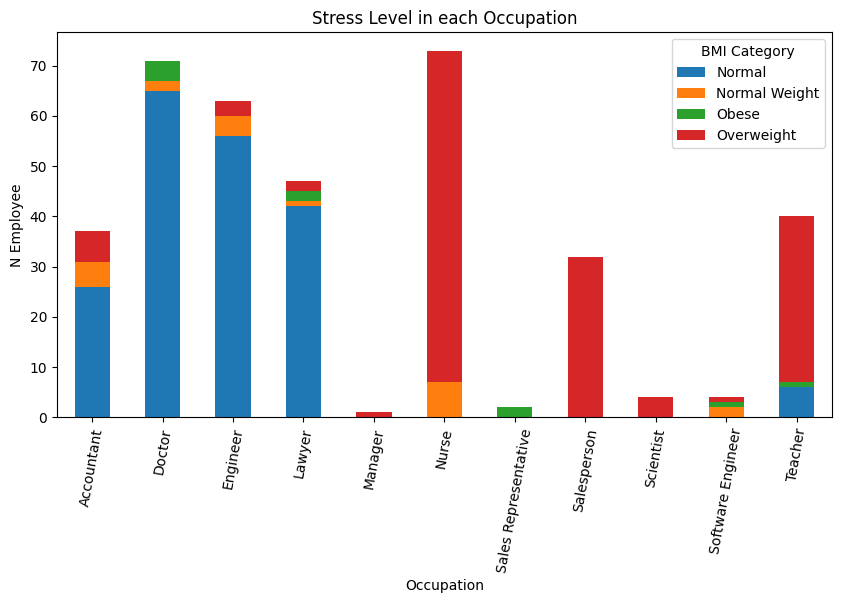

In [ ]:
BMI = pd.crosstab(df['Occupation'], df['BMI Category'])
BMI.plot(kind='bar', stacked=True,figsize=(10,5))

plt.xlabel('Occupation')
plt.ylabel('N Employee')
plt.title('Stress Level in each Occupation')

plt.xticks(rotation=80)
plt.show()

Dapat dilihat berdasarkan grafik diketahui, untuk profesi Nurse ternyata mayoritas mengalami BMI yang tergolong overweight. Hal ini menjadi salah satu faktor daripada banyaknya pekerja di bidang Nurse yang menderita Hypertensive stage 2. Selain faktor stress level dan juga usia.<br><br>
<h1>Kesimpulan</h1>
Berdasarkan data dan grafik yang telah disajikan beserta dengan pemaparannya, dapat menjadi pertimbangan atau knowledge bagi kita untuk mendorong employee di bidang Nurse memiliki berat badan ideal agar memenuhi standar BMI normal. Selain itu juga stress level yang dialami oleh employee di bidang Nurse harus diperhatikan dan dievaluasi. Salah satu solusinya dapat berupa pemerataan atau penambahan tenaga kesehatan, pelayanan konseling psikis, dan kegiatan kebugaran/olahraga rutin yang perlu diterapkan bagi tiap Nurse untuk menjaga kondisi berat badan yang ideal.
